In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Induce normality in target variable with log transformation

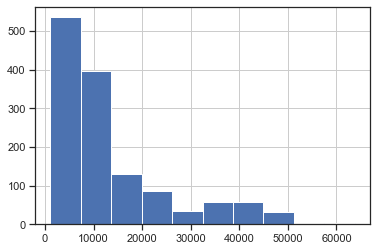

In [6]:
df['charges'].hist()

In [7]:
df['log_charges'] = np.log(df['charges'])

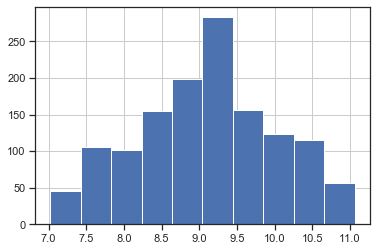

In [8]:
df['log_charges'].hist()

In [9]:
df.drop('charges', axis=1, inplace=True)
df

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


### Check if relationships are linear.

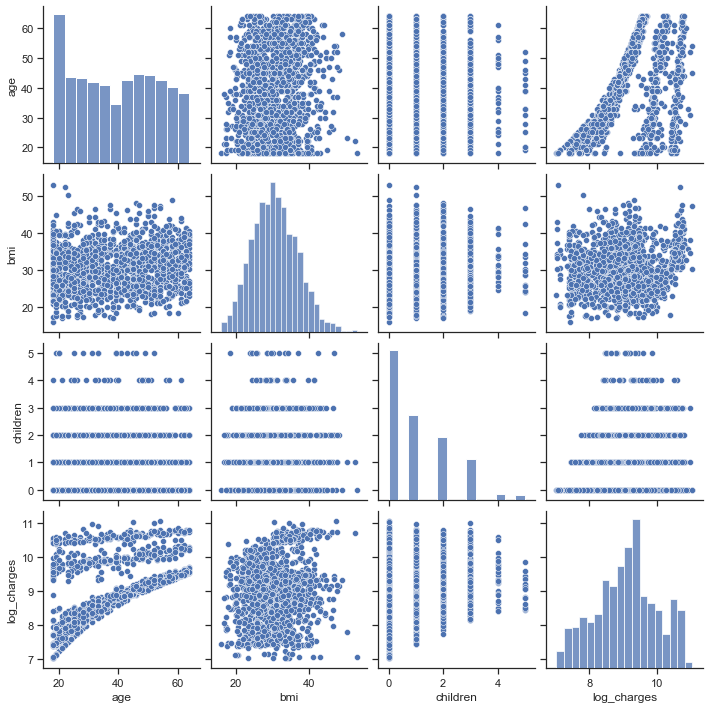

In [10]:
sns.pairplot(df)

### Test multicollinearity

In [11]:
df.corr()

,age,bmi,children,log_charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
log_charges,0.527834,0.132669,0.161336,1.000000


### Age Bins

In [12]:
bin_names = ['Young Adult', 'Adult', 'Senior']
bin_numbers = [0, 36, 56, 999]
df['age_group'] = pd.cut(df['age'], bins = bin_numbers, labels = bin_names)
df['age_group'] = df['age_group'].astype(str)

In [13]:
df['age_group'].value_counts()

Young Adult    599
Adult          549
Senior         190
Name: age_group, dtype: int64

### BMI Bins

In [14]:
bin_names = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']
bin_numbers = [0, 18.51, 25, 30, 100]
df['bmi_group'] = pd.cut(df['bmi'], bins = bin_numbers, labels = bin_names)
df['bmi_group'] = df['bmi_group'].astype(str)

In [15]:
df['bmi_group'].value_counts()

Obese             705
Overweight        386
Healthy Weight    226
Underweight        21
Name: bmi_group, dtype: int64

### Train Test Split

In [16]:
X = df.drop('log_charges', axis=1)
y = df['log_charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=354)

### One Hot Encoding

#### Training Data

In [18]:
X_train_ohe = X_train.copy()

# Select the object (string) columns
mask = X_train_ohe.dtypes == np.object
categorical_cols = X_train_ohe.columns[mask]

dummies = pd.get_dummies(X_train_ohe[categorical_cols], drop_first=True)

In [19]:
X_train_ohe.drop(categorical_cols, axis=1, inplace=True)
X_train_ohe = pd.concat([X_train_ohe, dummies], axis=1)

In [20]:
X_train_ohe.reset_index(inplace=True)
X_train_ohe.drop(['index'], axis=1, inplace=True)
X_train_ohe

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_Senior,age_group_Young Adult,bmi_group_Obese,bmi_group_Overweight,bmi_group_Underweight
0,62,39.200,0,0,0,0,0,1,1,0,1,0,0
1,18,33.660,0,1,0,0,1,0,0,1,1,0,0
2,39,42.655,0,1,0,0,0,0,0,0,1,0,0
3,19,33.100,0,1,0,0,0,1,0,1,1,0,0
4,43,35.310,2,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,50,36.200,0,1,0,0,0,1,0,0,1,0,0
999,35,28.900,3,1,0,0,0,1,0,1,0,1,0
1000,32,28.930,0,0,0,0,1,0,0,1,0,1,0
1001,63,30.800,0,1,0,0,0,1,1,0,1,0,0


#### Test Data

In [21]:
X_test_ohe = X_test.copy()

# Select the object (string) columns
mask = X_test_ohe.dtypes == np.object
categorical_cols = X_test_ohe.columns[mask]

dummies = pd.get_dummies(X_test_ohe[categorical_cols], drop_first=True)

In [22]:
X_test_ohe.drop(categorical_cols, axis=1, inplace=True)
X_test_ohe = pd.concat([X_test_ohe, dummies], axis=1)

In [23]:
X_test_ohe.reset_index(inplace=True)
X_test_ohe.drop(['index'], axis=1, inplace=True)
X_test_ohe

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_Senior,age_group_Young Adult,bmi_group_Obese,bmi_group_Overweight,bmi_group_Underweight
0,61,29.070,0,0,1,1,0,0,1,0,0,1,0
1,56,33.660,4,1,0,0,1,0,0,0,1,0,0
2,21,31.100,0,1,0,0,0,1,0,1,1,0,0
3,31,25.935,1,1,0,1,0,0,0,1,0,1,0
4,64,39.050,3,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,48,25.850,3,0,1,0,1,0,0,0,0,1,0
331,27,17.955,2,0,1,0,0,0,0,1,0,0,1
332,51,22.420,0,1,0,0,0,0,0,0,0,0,0
333,46,23.655,1,0,1,1,0,0,0,0,0,0,0


### Simple Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)


LinearRegression()

Coefficients: 
 [ 0.03830286  0.00574184  0.09454659 -0.06304766  1.56606354 -0.07476779
 -0.14786779 -0.13740643 -0.08519729  0.06805348  0.11501178  0.02017797
 -0.0754047 ]
Mean squared error: 0.18
R-Squared: 0.779


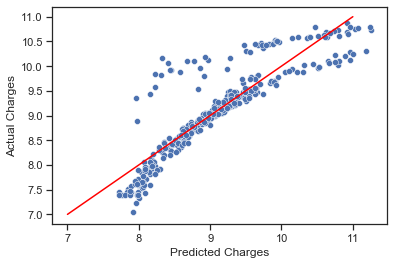

In [33]:
# Make predictions using the testing set
y_pred = lr.predict(X_test_ohe)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R-Squared: %.3f'
      % r2_score(y_test, y_pred))

# Plot outputs
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(xlabel='Predicted Charges', ylabel='Actual Charges')

# Baseline
line = np.linspace(start=7, stop=11, num=335)
sns.lineplot(x=line, y=line, ax=ax, color='red')


### Check residual assumptions

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Charges')]

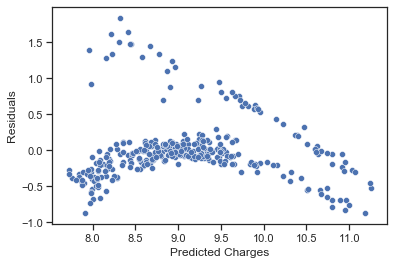

In [34]:
resid = y_test - y_pred

# Plot residuals
ax_resid = sns.scatterplot(x=y_pred, y=resid)
ax_resid.set(xlabel='Predicted Charges', ylabel='Residuals')

### Find Best Polynomial Terms

Loop through to find best degrees value to maximize R-Squared

In [45]:
for degree in range(1, 6):
    for interactions in [False, True]:
        pf = PolynomialFeatures(degree, interaction_only=interactions)
        X_numerical = X_train_ohe[['age', 'bmi', 'children']]
        X_train_categorical = X_train_ohe.drop(['age', 'bmi', 'children'], axis=1)

        # Create the features and fit the model
        X_poly = pf.fit_transform(X_numerical)
        X_poly_df = pd.DataFrame(X_poly, columns = pf.get_feature_names(X_numerical.columns))
        X_train_poly = pd.concat([X_poly_df, X_train_categorical], axis=1)

        #Repeat for test data
        X_numerical_test = X_test_ohe[['age', 'bmi', 'children']]
        X_test_categorical = X_test_ohe.drop(['age', 'bmi', 'children'], axis=1)

        # Create the features and fit the model
        X_poly_test = pf.fit_transform(X_numerical_test)
        X_poly_test_df = pd.DataFrame(X_poly_test, columns = pf.get_feature_names(X_numerical_test.columns))
        X_test_poly = pd.concat([X_poly_test_df, X_test_categorical], axis=1)

        lr_poly = LinearRegression()
        lr_poly = lr_poly.fit(X_train_poly, y_train)

        #Print degrees, MSE, R-Squared
        y_pred_poly = lr_poly.predict(X_test_poly)
        
        #Interactions
        print('Interactions Only: ' + str(interactions))

        #Degrees
        print('Degrees: ' + str(degree))

        # The mean squared error
        print('Mean squared error: %.2f'
              % mean_squared_error(y_test, y_pred_poly))
        # The coefficient of determination: 1 is perfect prediction
        print('R-Squared: %.3f'
              % r2_score(y_test, y_pred_poly))
        print('\n')

Interactions Only: False
Degrees: 1
Mean squared error: 0.18
R-Squared: 0.779


Interactions Only: True
Degrees: 1
Mean squared error: 0.18
R-Squared: 0.779


Interactions Only: False
Degrees: 2
Mean squared error: 0.17
R-Squared: 0.793


Interactions Only: True
Degrees: 2
Mean squared error: 0.18
R-Squared: 0.790


Interactions Only: False
Degrees: 3
Mean squared error: 0.17
R-Squared: 0.795


Interactions Only: True
Degrees: 3
Mean squared error: 0.18
R-Squared: 0.790


Interactions Only: False
Degrees: 4
Mean squared error: 0.18
R-Squared: 0.786


Interactions Only: True
Degrees: 4
Mean squared error: 0.18
R-Squared: 0.790


Interactions Only: False
Degrees: 5
Mean squared error: 0.24
R-Squared: 0.714


Interactions Only: True
Degrees: 5
Mean squared error: 0.18
R-Squared: 0.790




The best performing model uses all polynomial terms with 3 degrees.  This yields an R-Squared value of 0.761 and an MSE value of 33,748,853.

### Add Polynomial Terms to Data

In [71]:
# Setup the polynomial features
degree = 3
pf = PolynomialFeatures(degree, interaction_only=False)

In [72]:
X_numerical = X_train_ohe[['age', 'bmi', 'children']]
X_train_categorical = X_train_ohe.drop(['age', 'bmi', 'children'], axis=1)

In [73]:
# Create the features and fit the model
X_poly = pf.fit_transform(X_numerical)
X_poly_df = pd.DataFrame(X_poly, columns = pf.get_feature_names(X_numerical.columns))
X_train_poly = pd.concat([X_poly_df, X_train_categorical], axis=1)

In [74]:
X_train_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   1                      1003 non-null   float64
 1   age                    1003 non-null   float64
 2   bmi                    1003 non-null   float64
 3   children               1003 non-null   float64
 4   age^2                  1003 non-null   float64
 5   age bmi                1003 non-null   float64
 6   age children           1003 non-null   float64
 7   bmi^2                  1003 non-null   float64
 8   bmi children           1003 non-null   float64
 9   children^2             1003 non-null   float64
 10  age^3                  1003 non-null   float64
 11  age^2 bmi              1003 non-null   float64
 12  age^2 children         1003 non-null   float64
 13  age bmi^2              1003 non-null   float64
 14  age bmi children       1003 non-null   float64
 15  age 

Repeat steps for test data sets

In [75]:
X_numerical_test = X_test_ohe[['age', 'bmi', 'children']]
X_test_categorical = X_test_ohe.drop(['age', 'bmi', 'children'], axis=1)

In [76]:
# Create the features and fit the model
X_poly_test = pf.transform(X_numerical_test)
X_poly_test_df = pd.DataFrame(X_poly_test, columns = pf.get_feature_names(X_numerical_test.columns))
X_test_poly = pd.concat([X_poly_test_df, X_test_categorical], axis=1)

In [77]:
X_test_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   1                      335 non-null    float64
 1   age                    335 non-null    float64
 2   bmi                    335 non-null    float64
 3   children               335 non-null    float64
 4   age^2                  335 non-null    float64
 5   age bmi                335 non-null    float64
 6   age children           335 non-null    float64
 7   bmi^2                  335 non-null    float64
 8   bmi children           335 non-null    float64
 9   children^2             335 non-null    float64
 10  age^3                  335 non-null    float64
 11  age^2 bmi              335 non-null    float64
 12  age^2 children         335 non-null    float64
 13  age bmi^2              335 non-null    float64
 14  age bmi children       335 non-null    float64
 15  age ch

Fit model to training data

In [78]:
print(X_train_poly.shape)
print(y_train.shape)

(1003, 30)
(1003,)


In [79]:
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train_poly, y_train)

Make test predictions

In [81]:
# Make predictions using the testing set
y_pred_poly = lr_poly.predict(X_test_poly)

# The coefficients
print('Coefficients: \n', lr_poly.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('R-Squared: %.3f'
      % r2_score(y_test, y_pred_poly))

Coefficients: 
 [-2.26462190e+07  3.28117761e-02  1.34108968e-02  7.28034210e-01
  9.87368030e-04 -6.80184205e-04 -2.06528667e-02  8.57950667e-04
 -8.17962445e-04 -1.20777766e-01 -1.16218261e-05  8.51152076e-07
  1.29462834e-04  6.11787342e-06  6.88065697e-05  1.60676912e-03
 -1.53139171e-05 -4.69460261e-05  5.99878829e-04  5.99623339e-03
 -6.72445229e-02  1.57429575e+00 -7.38248650e-02 -1.50188309e-01
 -1.23214898e-01  5.13621393e-02  6.49664835e-02  3.62600874e-02
 -3.13834973e-02 -4.47279094e-02]
Mean squared error: 0.17
R-Squared: 0.795


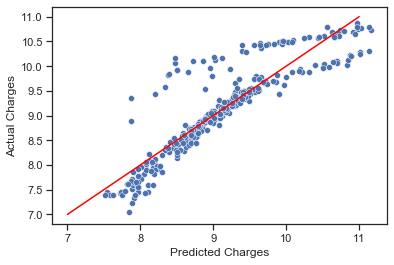

In [82]:
# Plot outputs
ax_poly = sns.scatterplot(x=y_pred_poly, y=y_test)
ax_poly.set(xlabel='Predicted Charges', ylabel='Actual Charges')

# Baseline
line = np.linspace(start=7, stop=11, num=335)
sns.lineplot(x=line, y=line, ax=ax_poly, color='red')

### Add Regularization

In [83]:
elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], normalize=True, cv=5, n_jobs=-1, random_state=347)
elastic_cv.fit(X_train_ohe, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_jobs=-1,
             normalize=True, random_state=347)

In [84]:
elastic_cv.alpha_

0.00016725786740364143

In [85]:
elastic_cv.l1_ratio_

1.0

In [86]:
elastic_cv.score(X_train_ohe, y_train)

0.7655376509960581

In [87]:
elastic_cv.score(X_test_ohe, y_test)

0.7774972245968742

In [95]:
elastic_cv_poly = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], normalize=True, cv=5, n_jobs=-1, random_state=347, max_iter=2000)
elastic_cv_poly.fit(X_train_poly, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=2000,
             n_jobs=-1, normalize=True, random_state=347)

In [96]:
elastic_cv_poly.alpha_

1.9230590308264364e-05

In [97]:
elastic_cv_poly.l1_ratio_

1.0

In [98]:
elastic_cv_poly.score(X_train_poly, y_train)

0.7720871565886762

In [99]:
elastic_cv_poly.score(X_test_poly, y_test)

0.7919231755552811

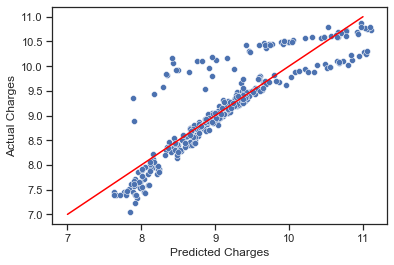

In [100]:
y_pred_reg = elastic_cv_poly.predict(X_test_poly)

# Plot outputs
ax_reg = sns.scatterplot(x=y_pred_reg, y=y_test)
ax_reg.set(xlabel='Predicted Charges', ylabel='Actual Charges')

# Baseline
line = np.linspace(start=7, stop=11, num=335)
sns.lineplot(x=line, y=line, ax=ax_reg, color='red')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Charges')]

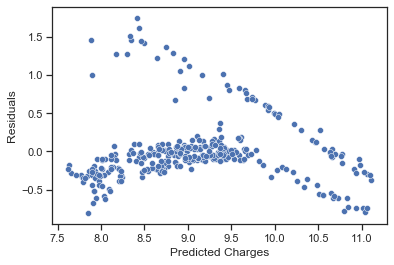

In [101]:
resid_reg = y_test - y_pred_reg

# Plot residuals
ax_reg_resid = sns.scatterplot(x=y_pred_reg, y=resid_reg)
ax_reg_resid.set(xlabel='Predicted Charges', ylabel='Residuals')